SilhouetteMethod คือวิธีการที่ช่วยประเมินว่าแต่ละจุดอยู่ใน cluster ของตัวเองได้ดีแค่ไหนและแแยกจาก cluster อื่นได้ดีเพียงใด

### **1.Import Library**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler

### **2.โหลด+สำรวจข้อมูล**

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/BaskinRobbins.csv')
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0
...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


In [34]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,70.000000,70.000000,70.000000,70.0000,70.000000,70.000000
mean,191.714286,10.562857,0.277143,22.9000,16.914286,3.567143
std,61.643468,7.947275,0.145633,5.4511,4.497158,1.679175
min,70.000000,0.000000,0.000000,13.0000,4.000000,0.000000
25%,152.500000,7.250000,0.200000,18.0000,14.000000,3.000000
50%,180.000000,10.000000,0.300000,21.0000,17.000000,3.500000
75%,240.000000,13.750000,0.400000,27.0000,20.000000,5.000000
max,330.000000,60.000000,0.500000,38.0000,28.000000,8.000000


In [35]:
df.isnull().sum() #ตรวจสอบค่าว่าง

,0
Flavour,0
Calories,0
Total Fat (g),0
Trans Fat (g),0
Carbohydrates (g),0
Sugars (g),0
Protein (g),0


### **3.เลือก Features สำหรับ Clustering**

In [36]:
x = df[['Calories', 'Total Fat (g)', 'Sugars (g)']]

### **4.Features Scaling ด้วย MinMaxScaler**

In [37]:
mms = MinMaxScaler() #ปรับช่วงข้อมูลเป็น 0-1 เพื่อให้ทุก Features มีน้ำหนักเท่ากันในการคำนวณระยะห่าง
x_scaled = mms.fit_transform(x) #x_scaled เก็บ numpy array
x_scaled[:5]

array([[0.34615385, 0.13333333, 0.5       ],
       [0.34615385, 0.15      , 0.375     ],
       [0.38461538, 0.15      , 0.45833333],
       [0.19230769, 0.06666667, 0.5       ],
       [0.23076923, 0.03333333, 0.66666667]])

### **5.คำนวณ Silhouette Scores สำหรับ K ที่แตกต่างกัน**

In [38]:
scores = []
K=range(2,12)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=7,n_init='auto')
  kmeans.fit(x_scaled) #ฝึกโมเดล KMean ด้วย x_scaled
  sil_score = silhouette_score(x_scaled, kmeans.labels_) #คำนวณ Silhouette Scores
  scores.append(sil_score) #เอาค่า sil_score ไปต่อท้าย list scores
scores
#ค่า Silhouette Scores เข้าใกล้ +1 : จุดข้อมูลอยู่ในกลุ่มตัวเองได้ดีและแยกจากกลุ่มได้ชัดเจน
#ค่า silhouette Scores เข้าใกล้ 0 : จุดข้อมูลจะอยู่บนเส้นแบ่งระหว่าง 2 กลุ่ม
#ค่า silhouette Scores เข้าใกล้ -1 : จุดข้อมูลอาจจะอยู่ในกลุ่มข้อมูลที่ไม่ถูกต้อง

[np.float64(0.4973474270334438),
 np.float64(0.40632472506954204),
 np.float64(0.3130254427329004),
 np.float64(0.339772581933944),
 np.float64(0.35638223046710216),
 np.float64(0.29742474116108153),
 np.float64(0.3866589064232391),
 np.float64(0.37623250113955187),
 np.float64(0.3682179626079535),
 np.float64(0.39407078417246927)]

In [39]:
dd = pd.DataFrame(K, columns=['k'])
dd['Silhouette Scores'] = scores
dd

,k,Silhouette Scores
0,2,0.497347
1,3,0.406325
2,4,0.313025
3,5,0.339773
4,6,0.356382
5,7,0.297425
6,8,0.386659
7,9,0.376233
8,10,0.368218
9,11,0.394071


### **6.Plot Graph Silhouette Scores vs. k**

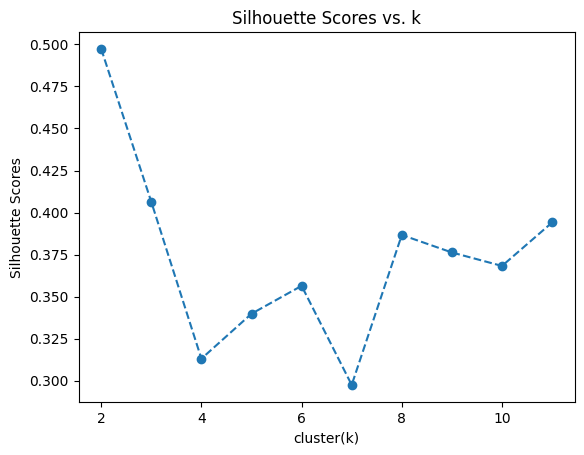

In [40]:
plt.plot(dd['k'], dd['Silhouette Scores'], linestyle='--', marker='o')
plt.xlabel('cluster(k)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores vs. k')
plt.show()

### **7.รัน KMean ด้วย k ที่ดีที่สุด**

In [41]:
kmeans =  KMeans(n_clusters = 2, random_state=7, n_init='auto')
kmeans.fit(x_scaled)

KMeans(n_clusters=2, random_state=7)

### **8.เพิ่ม Cluster Label เข้าไปใน DataFrame**

In [42]:
df['cluster'] = kmeans.labels_ # สร้าง clooumn cluster
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


### **9.สำรวจข้อมูลแต่ละกลุ่ม**

In [44]:
df.cluster.value_counts().sort_index() #นับจำนวนข้อมูลที่อยู่ในแต่ละกลุ่ม

,count
cluster,
0,42
1,28


In [46]:
kmeans.cluster_centers_ #ดูจุดศูนย์กลางของแต่ละกลุ่ม (Centroid)

array([[0.30677656, 0.11365079, 0.44047619],
       [0.71016484, 0.26964286, 0.68452381]])

In [48]:
pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
#ปรับค่า Centroid จาก numpy array เป็น DataFrame

,Calories,Total Fat (g),Sugars (g)
0,0.306777,0.113651,0.440476
1,0.710165,0.269643,0.684524


### **10.คำนวณ Silhouette Scores ของแต่ละจุด**

In [49]:
sil_vals = silhouette_samples(x_scaled,kmeans.labels_)
sil_vals[:5]

array([0.59286839, 0.61204561, 0.57402989, 0.60923777, 0.46034744])

In [51]:
df['sil_vals'] = sil_vals
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,sil_vals
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,0.592868
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,0.612046
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,0.574030
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,0.609238
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0,0.460347
...,...,...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,1,0.186126
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,0,0.465318
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0,0,0.568803
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0,0,0.592868


In [52]:
df.sort_values('sil_vals') #เรียงค่า silhouette values จากน้อยไปมาก เพื่อดูข้อมูลที่มันสับสน

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,sil_vals
62,Vanilla,220,14.0,0.5,20,16,5.0,1,0.117615
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,1,0.186126
38,Mom’s Makin Cookies,190,9.0,0.2,24,18,2.0,0,0.219178
69,World Class Chocolate,260,60.0,0.4,25,18,5.0,1,0.220649
10,Chocoholic’s Resolution,190,11.0,0.2,22,17,3.0,0,0.277361
...,...,...,...,...,...,...,...,...,...
28,Jamoca Almond Fudge,260,15.0,0.4,28,20,5.0,1,0.616570
57,Salty Caramel,160,8.0,0.3,18,15,3.0,0,0.617021
5,Blueberry Cheesecake,150,8.0,0.3,18,14,3.0,0,0.639229
32,Mango Mania,130,6.0,0.2,17,14,2.0,0,0.642054


In [53]:
df[df.cluster==0]

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,sil_vals
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,0.592868
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,0.612046
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,0.574030
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,0.609238
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0,0.460347
5,Blueberry Cheesecake,150,8.0,0.3,18,14,3.0,0,0.639229
6,Brownie Sundae(No Sugar Added),120,5.0,0.1,21,4,3.0,0,0.446954
7,Caramel Praline Cheesecake,170,8.0,0.2,21,17,3.0,0,0.498427
8,NSA Caramel Turtle Truffle,200,8.0,0.2,38,7,5.0,0,0.352552
10,Chocoholic’s Resolution,190,11.0,0.2,22,17,3.0,0,0.277361


In [54]:
df[df.cluster==1]

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,sil_vals
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1,0.321354
11,Chocolate,230,13.0,0.4,25,18,5.0,1,0.391266
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1,0.487783
13,Chocolate Chip Cookie Dough,280,15.0,0.5,31,23,5.0,1,0.610253
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,1,0.615699
19,Cookies ‘n Cream,270,17.0,0.4,25,18,5.0,1,0.576611
20,Cotton Candy,240,12.0,0.4,31,20,4.0,1,0.538216
25,Gold Medal Ribbon,240,12.0,0.4,30,23,4.0,1,0.559159
27,Icing on the Cake,320,18.0,0.4,36,28,4.0,1,0.487860
28,Jamoca Almond Fudge,260,15.0,0.4,28,20,5.0,1,0.616570


In [57]:
df.to_csv('BaskinRobbinCluster_kmean.csv')